# Error Analysis

## Import Libraries

In [14]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

## Load the data set and split

In [3]:
mnist = fetch_openml("mnist_784", version = 1, as_frame = False)

C:\Users\ayush\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
X, y = mnist['data'], mnist['target']

X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

## Load the model and train it

In [7]:
clf = LogisticRegression(max_iter = 1000)
clf.fit(X_train, y_train)

C:\Users\ayush\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

## Make Predictions

In [8]:
y_pred = clf.predict(X_test)

## Raw Confusion Matrix

In [9]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 955,    0,    3,    2,    1,    5,    6,    4,    4,    0],
       [   0, 1110,    8,    3,    0,    1,    3,    2,    8,    0],
       [   5,   13,  917,   18,   12,    6,   11,    9,   38,    3],
       [   3,    1,   18,  921,    2,   23,    3,   11,   22,    6],
       [   3,    3,    6,    4,  908,    0,   10,    7,   11,   30],
       [  12,    5,    3,   36,   12,  758,   17,    6,   36,    7],
       [  10,    3,    8,    2,    7,   18,  906,    1,    3,    0],
       [   4,    7,   25,    8,    4,    2,    0,  945,    3,   30],
       [   7,   14,    6,   21,    6,   23,   10,   14,  862,   11],
       [   8,    7,    1,   10,   21,    7,    1,   22,    9,  923]],
      dtype=int64)

### What this shows:
* How many 5s became 3s
* How many 9s became 4s
* But dominated by class frequency

Useful, but misleading.

## Normalize the confusion matrix

In [11]:
cm_norm = cm/cm.sum(axis =1, keepdims = True)
cm_norm

array([[9.74489796e-01, 0.00000000e+00, 3.06122449e-03, 2.04081633e-03,
        1.02040816e-03, 5.10204082e-03, 6.12244898e-03, 4.08163265e-03,
        4.08163265e-03, 0.00000000e+00],
       [0.00000000e+00, 9.77973568e-01, 7.04845815e-03, 2.64317181e-03,
        0.00000000e+00, 8.81057269e-04, 2.64317181e-03, 1.76211454e-03,
        7.04845815e-03, 0.00000000e+00],
       [4.84496124e-03, 1.25968992e-02, 8.88565891e-01, 1.74418605e-02,
        1.16279070e-02, 5.81395349e-03, 1.06589147e-02, 8.72093023e-03,
        3.68217054e-02, 2.90697674e-03],
       [2.97029703e-03, 9.90099010e-04, 1.78217822e-02, 9.11881188e-01,
        1.98019802e-03, 2.27722772e-02, 2.97029703e-03, 1.08910891e-02,
        2.17821782e-02, 5.94059406e-03],
       [3.05498982e-03, 3.05498982e-03, 6.10997963e-03, 4.07331976e-03,
        9.24643585e-01, 0.00000000e+00, 1.01832994e-02, 7.12830957e-03,
        1.12016293e-02, 3.05498982e-02],
       [1.34529148e-02, 5.60538117e-03, 3.36322870e-03, 4.03587444e-02,
   

## Zero out the diagonal

In [12]:
np.fill_diagonal(cm_norm, 0)
cm_norm

array([[0.        , 0.        , 0.00306122, 0.00204082, 0.00102041,
        0.00510204, 0.00612245, 0.00408163, 0.00408163, 0.        ],
       [0.        , 0.        , 0.00704846, 0.00264317, 0.        ,
        0.00088106, 0.00264317, 0.00176211, 0.00704846, 0.        ],
       [0.00484496, 0.0125969 , 0.        , 0.01744186, 0.01162791,
        0.00581395, 0.01065891, 0.00872093, 0.03682171, 0.00290698],
       [0.0029703 , 0.0009901 , 0.01782178, 0.        , 0.0019802 ,
        0.02277228, 0.0029703 , 0.01089109, 0.02178218, 0.00594059],
       [0.00305499, 0.00305499, 0.00610998, 0.00407332, 0.        ,
        0.        , 0.0101833 , 0.00712831, 0.01120163, 0.0305499 ],
       [0.01345291, 0.00560538, 0.00336323, 0.04035874, 0.01345291,
        0.        , 0.0190583 , 0.00672646, 0.04035874, 0.00784753],
       [0.01043841, 0.00313152, 0.00835073, 0.00208768, 0.00730689,
        0.01878914, 0.        , 0.00104384, 0.00313152, 0.        ],
       [0.00389105, 0.00680934, 0.0243190

## Visualize the normalized confusion matrix

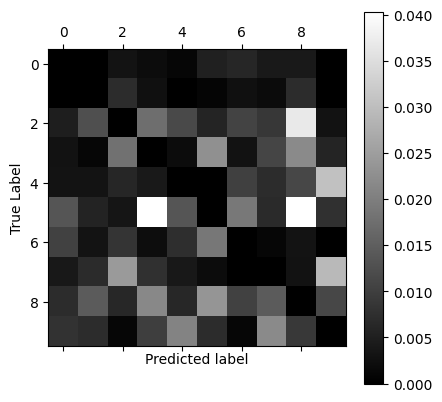

In [16]:
plt.matshow(cm_norm, cmap=plt.cm.gray)
plt.colorbar();
plt.xlabel("Predicted label");
plt.ylabel("True Label");

### What to look for:
* Bright off-diagonal cells = dominant confusions
* Symmetry vs asymmetry
* Shape-driven errors

## Identify strongest confusions programmatically

In [17]:
for i in range(10):
    j = np.argmax(cm_norm[i])
    print(f"Digit {i} is most often confused with {j}")

Digit 0 is most often confused with 6
Digit 1 is most often confused with 2
Digit 2 is most often confused with 8
Digit 3 is most often confused with 5
Digit 4 is most often confused with 9
Digit 5 is most often confused with 3
Digit 6 is most often confused with 5
Digit 7 is most often confused with 9
Digit 8 is most often confused with 5
Digit 9 is most often confused with 7


## Visualize misclassified images

In [19]:
misclassification_idx = np.where(y_test != y_pred)[0]

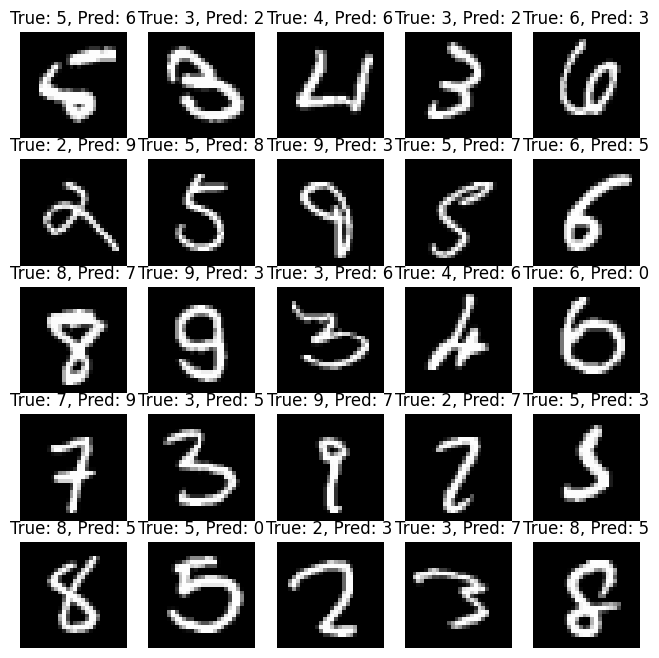

In [27]:
plt.figure(figsize=(8,8))

for i, idx in enumerate(misclassification_idx[:25]):
   
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap = 'gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    plt.axis("off");
   